<a href="https://colab.research.google.com/github/MariaAkterKhadiza/PHITRON_AI-ML-B1/blob/main/DL_Mid_Term_Exam_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DL Mid term exam

**Name:**Mariya Dewan

**Course Email:**  khadizatulmaria2002@gmail.com

## End of Assignment

Before submitting:
- Run all cells from top to bottom.  
- Check that all answer sections are filled.  
- Instruction video অনুযায়ী আমাদের দেয়া Colab ফাইলটি থেকে প্রথম একটি Save copy in drive করে নিবা। এরপর Google colab এর মধ্যে কোডগুলো করবে এবং সেই ফাইলটি ‘Anyone with the link’ & ‘View’ Access দিয়ে ফাইলটির Shareble Link টি সাবমিট করবে।

# Question 01: [ Marks 10 ]

Draw a Neural Network

Draw a neural network with:

3 input features

3 hidden layers (at least 2 neurons each)

1 output neuron

a) Label all weights and biases. <br>
b) Write the forward equations layer by layer. <br>
c) If output uses Sigmoid, write the final prediction equation. <br>

Please note : Don't forget to attach a screen short of your neural network.

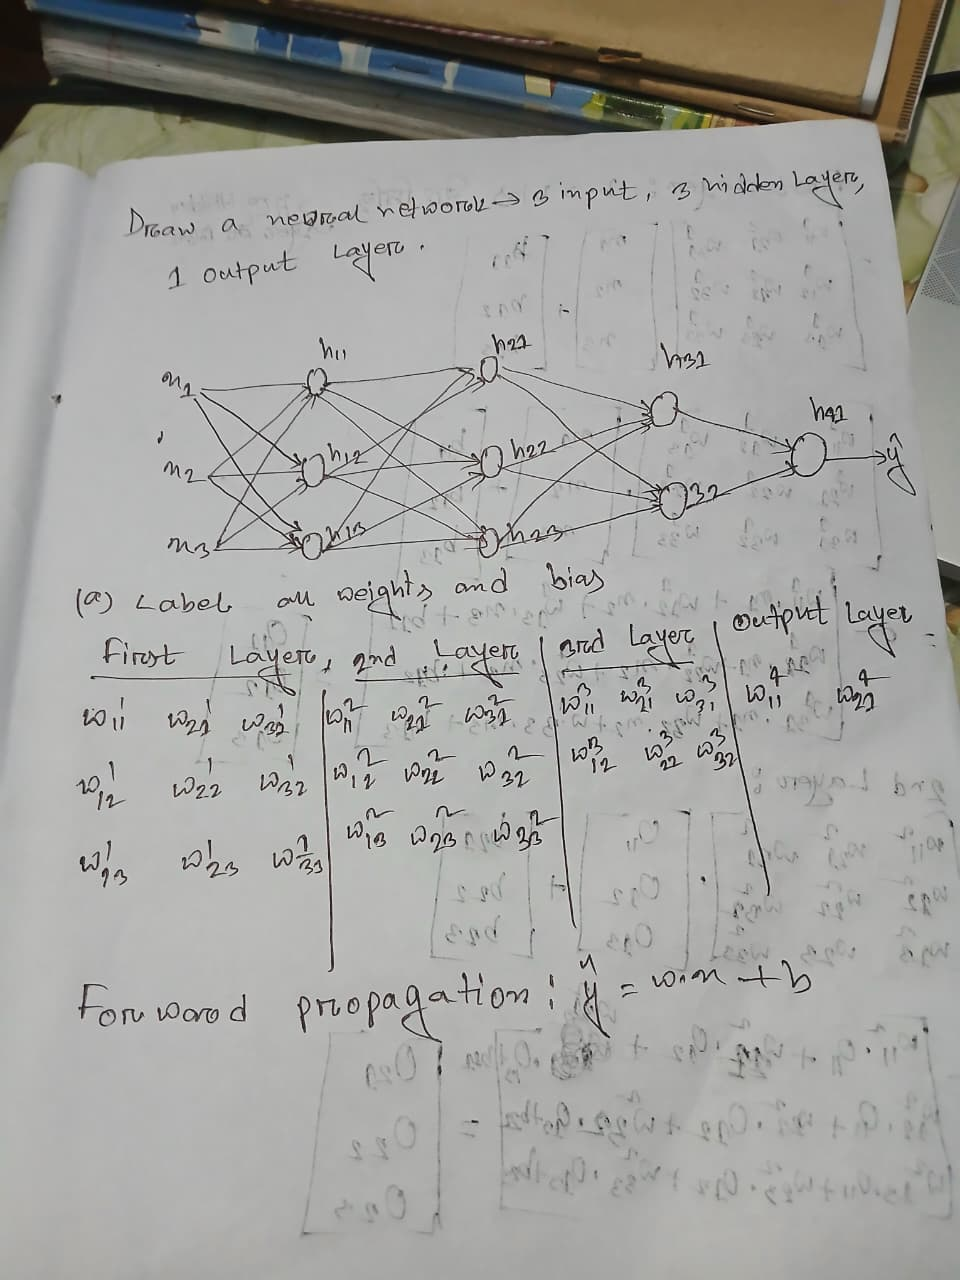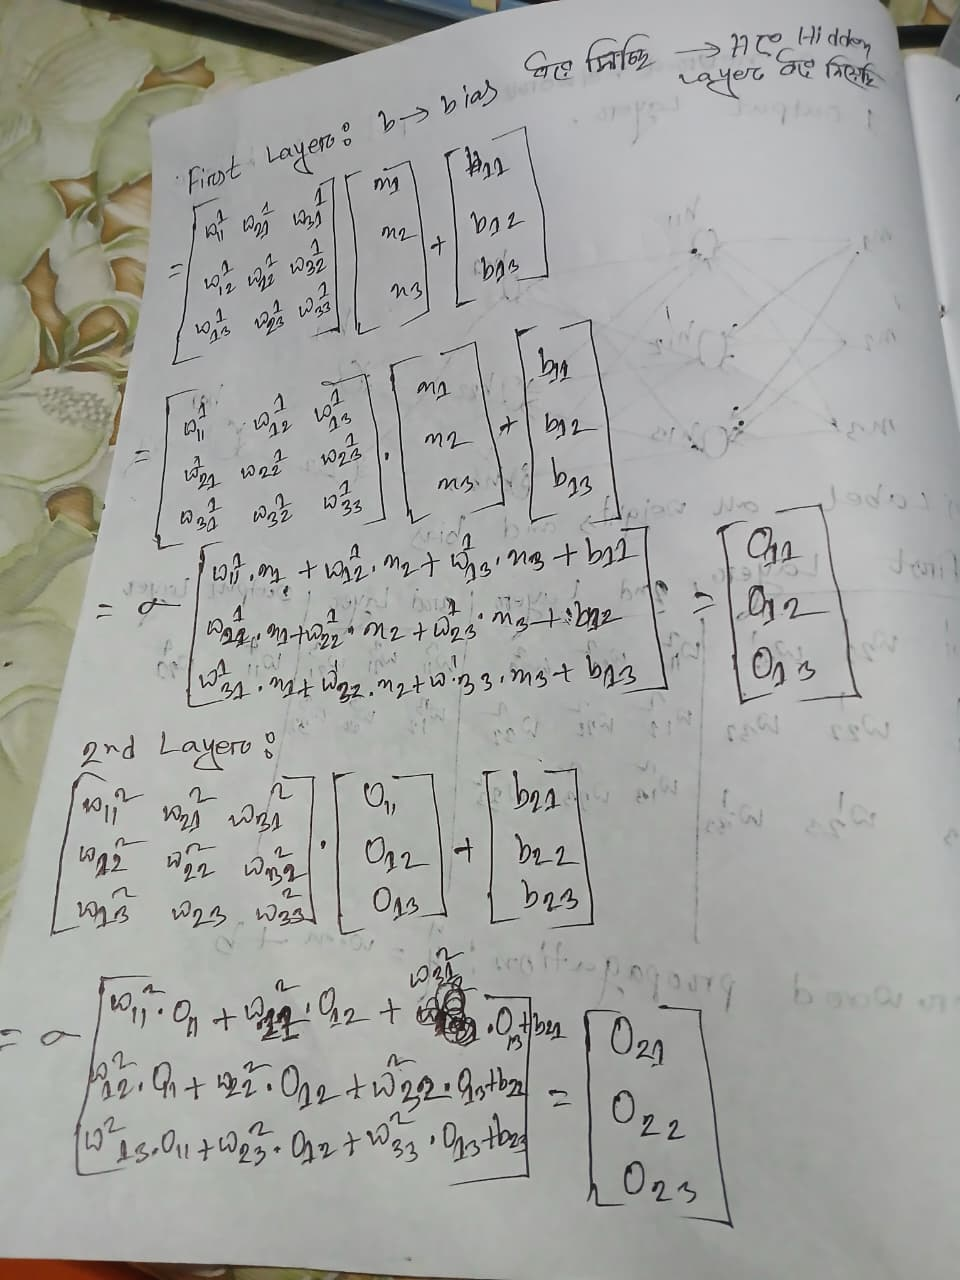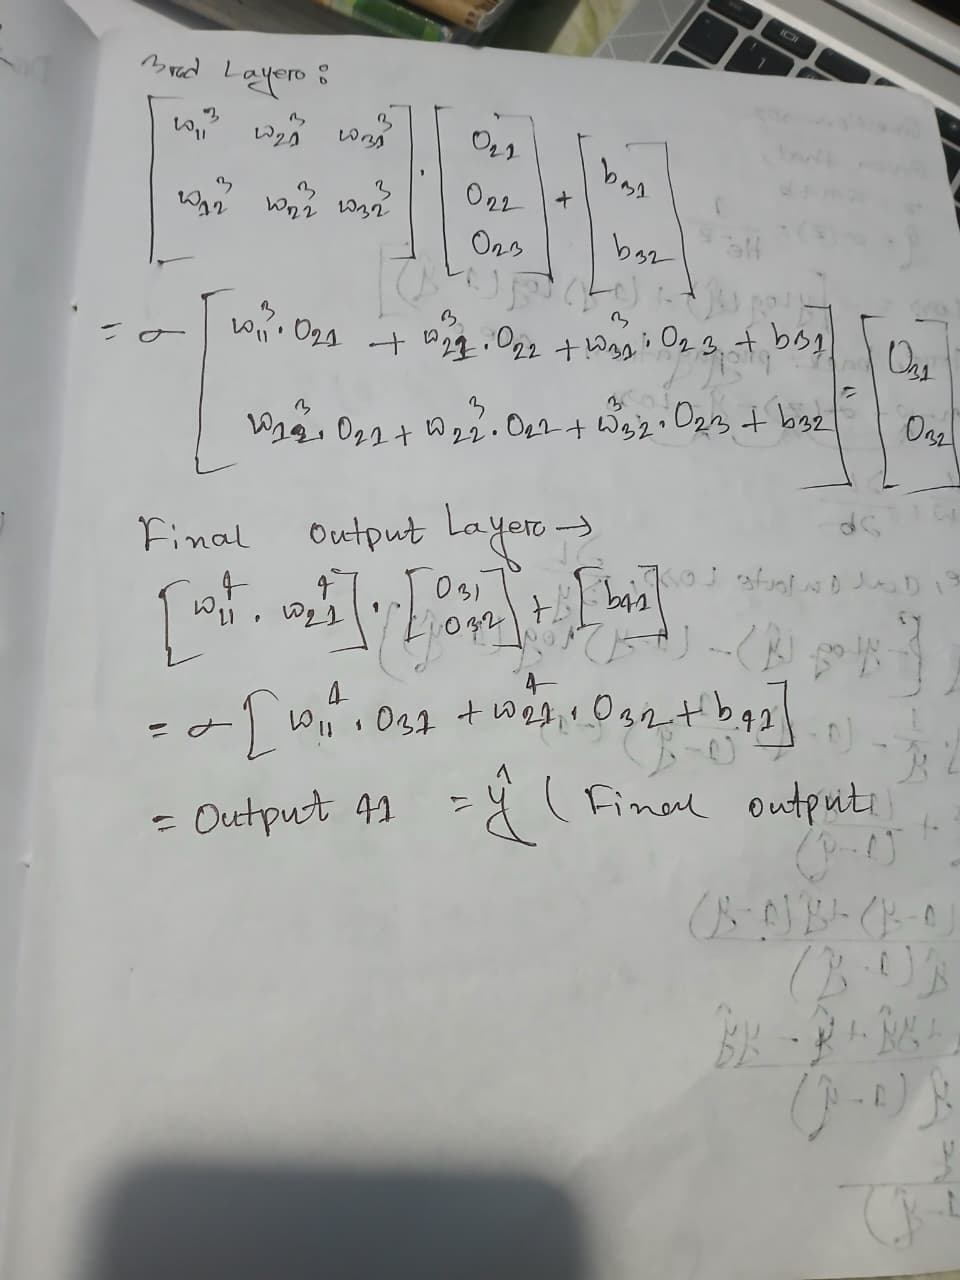**Write** Answer 01:


# Question 02: [ Marks 20 ]

Manual Gradient Calculation

Given:

z = w*x + b <br>
y_pred = sigmoid(z) <br>
L = −[ y log(y_pred) + (1−y) log(1−y_pred) ] <br>

a) Write dL/dy_pred <br>
b) Write dy_pred/dz <br>
c) Show that dL/dz = y_pred − y <br>

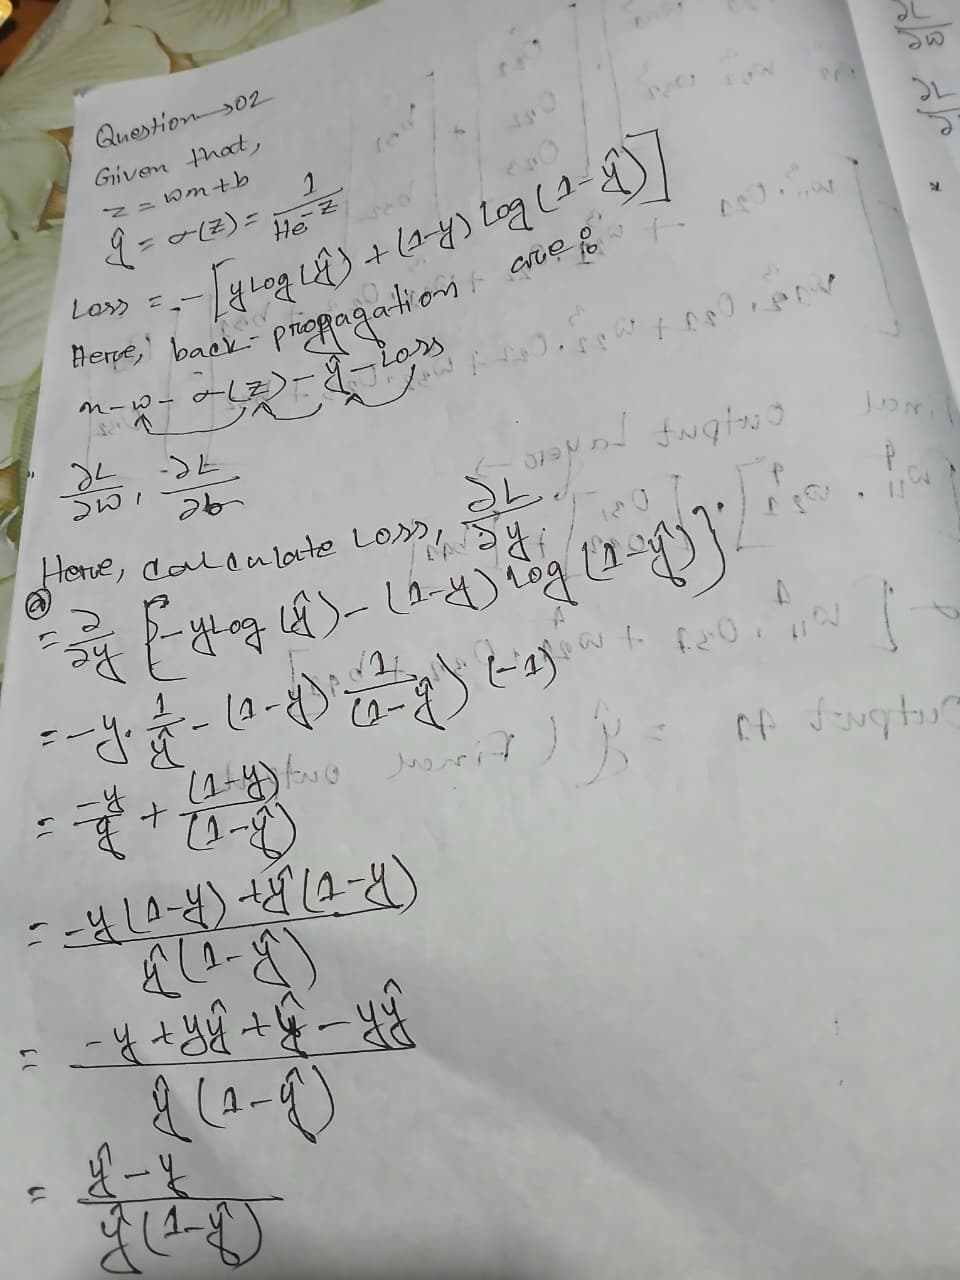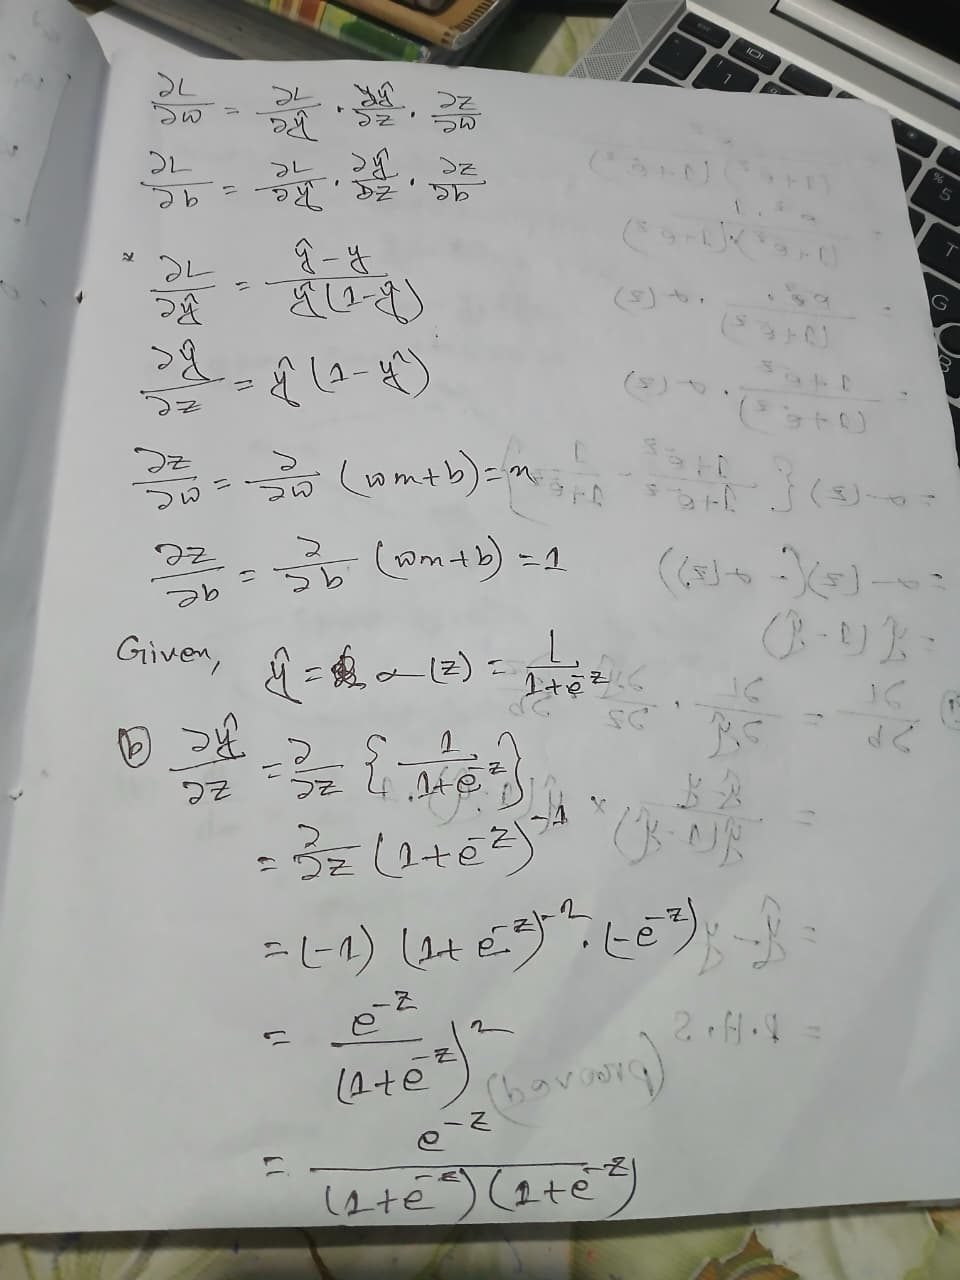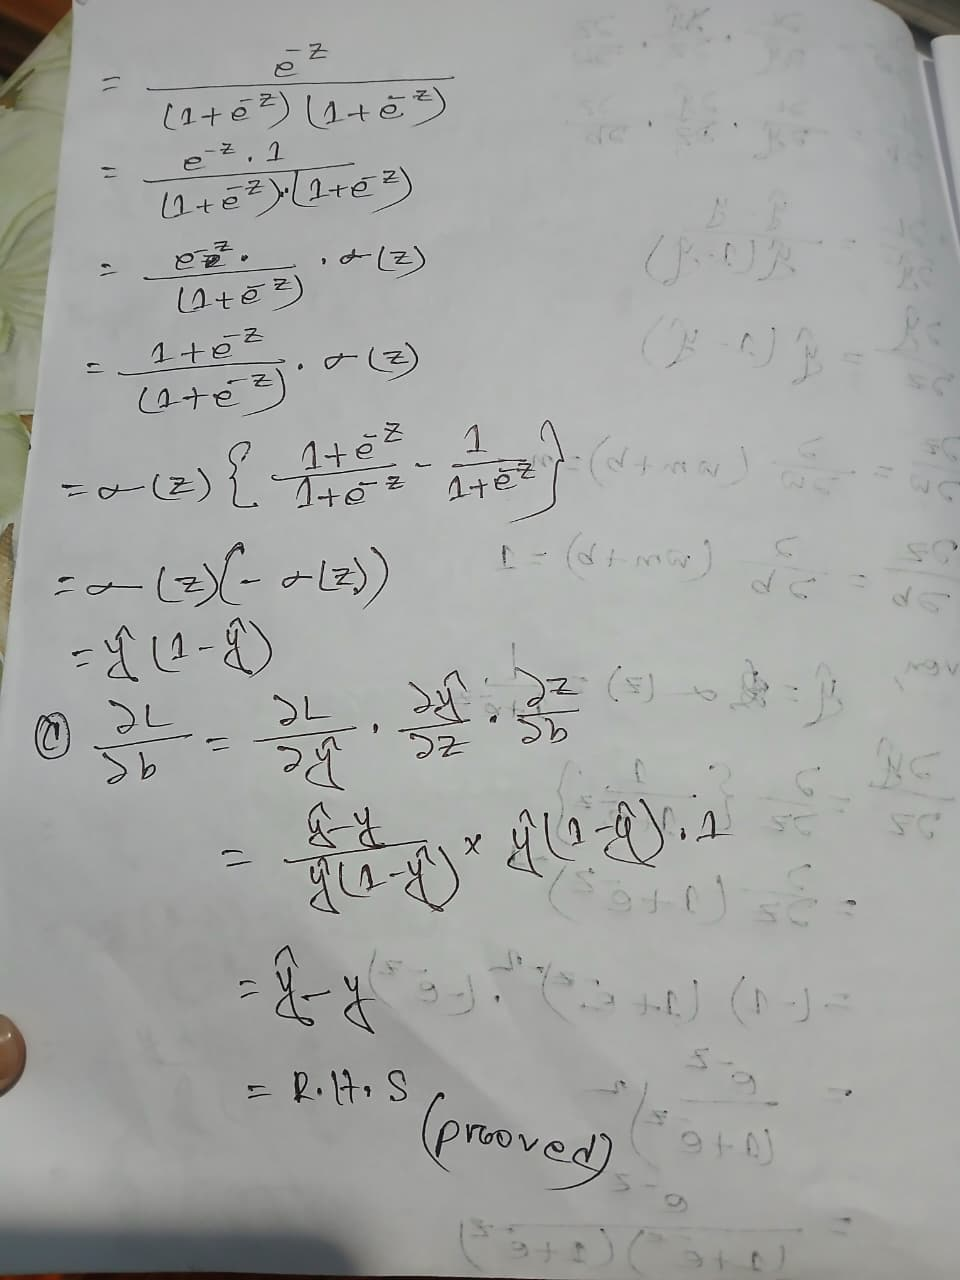

# Question 03: [ Marks 15 ]

x = 3
y1 = x^2
y2 = 4*x
L = y1 + y2

a) Draw the computation graph. <br>
b) Compute dL/dx manually. <br>
c) Explain how would you do it using Autograd <br>

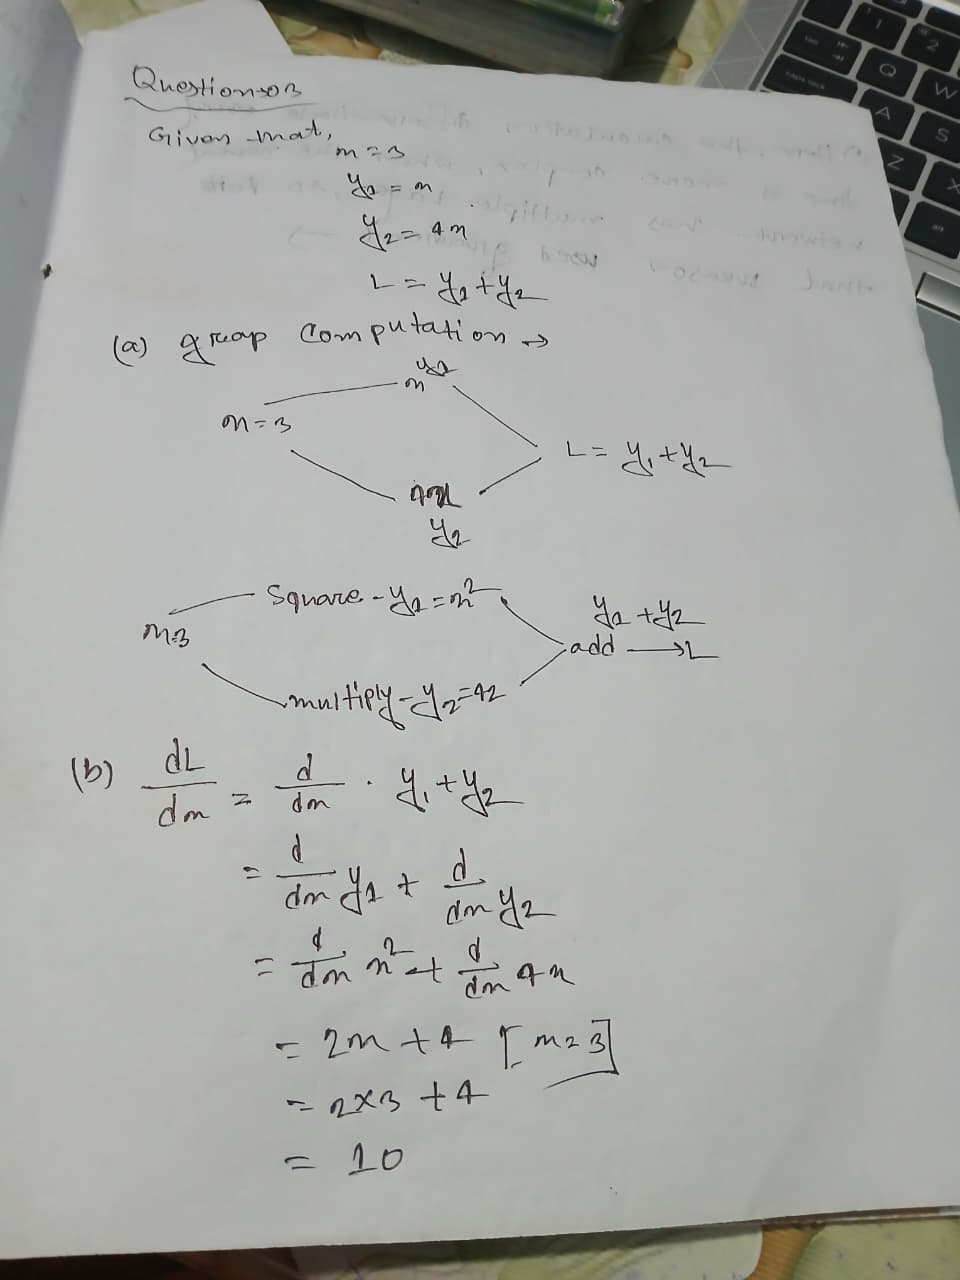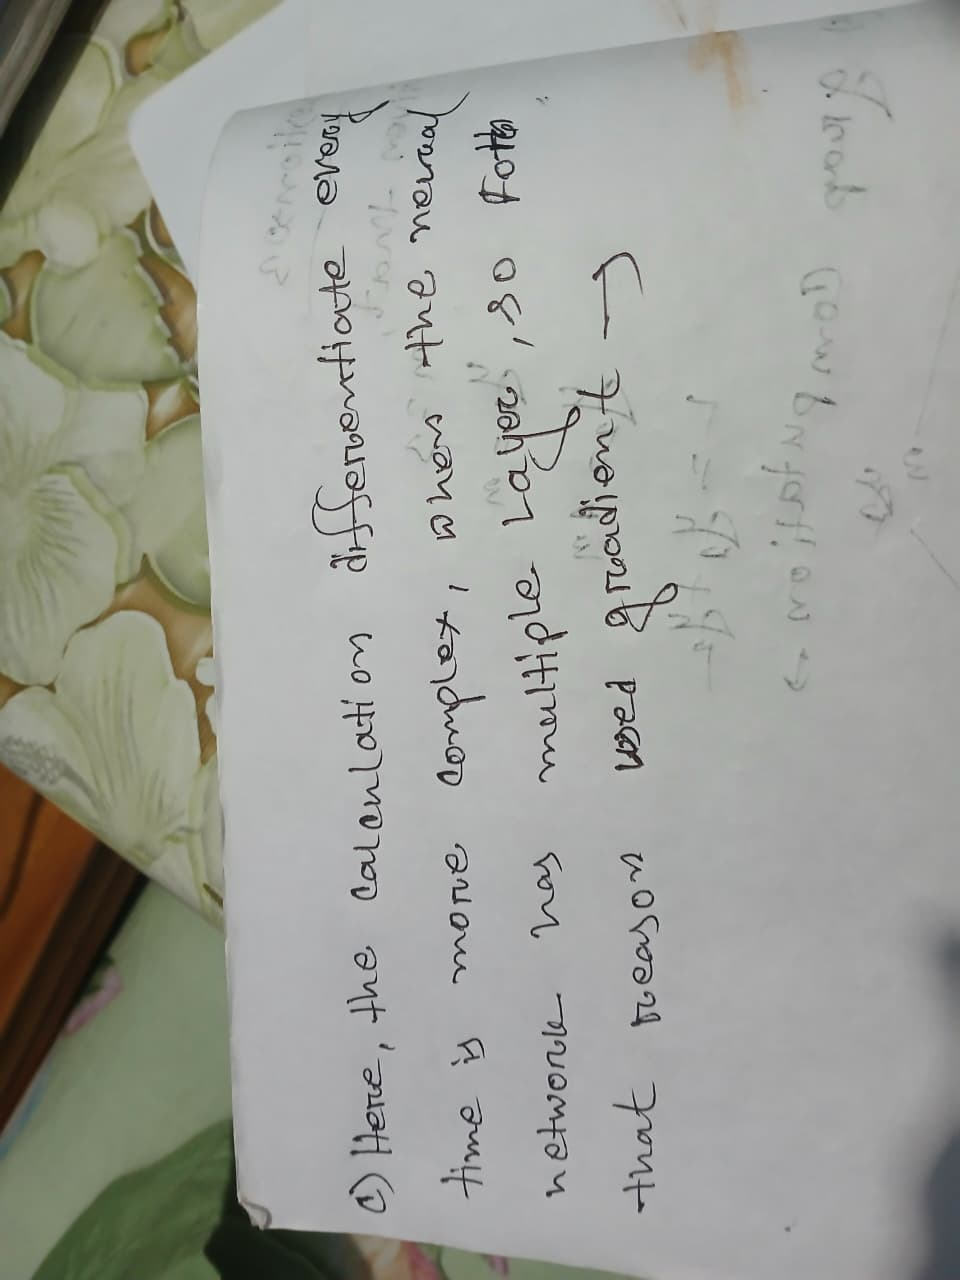## Write Answer 03:

In [1]:
# code using auto grad
import torch

x= torch.tensor(3.0 , requires_grad = True)

y1 = x**2
y2 = 4*x

l=y1+y2

l.backward()

x.grad

tensor(10.)

# Question 04: [ Marks 15 ]

Create a scalar tensor x = 3.0 with gradient tracking enabled. <br>
Compute y = x² + 4x. <br>
Perform backpropagation. <br>
Print the gradient of x. <br>

Write the full PyTorch code yourself. <br>

## Write Answer 04:

In [2]:
x = torch.tensor(3.0 , requires_grad = True)

y = x**2 + 4*x

y.backward()

x.grad

tensor(10.)

# Question 05: [ Marks 10 ]

Create two tensors:
w = 2.0 (requires_grad=True) <br>
b = 1.0 (requires_grad=True) <br>

Let input x = 3.0. <br>
Compute z = w*x + b. <br>
Use Sigmoid to get y_pred.
 <br>

Define Binary Cross Entropy manually (without built-in loss). <br>
Compute gradients using backward(). <br>
Print gradients of w and b. <br>

Write full code.

In [3]:
# here the loss function of BCE

def bce_loss(y_pred,y):
  epsilon = 1e-8
  y=torch.clamp(y,epsilon,1-epsilon)

  return -(y*torch.log(y_pred)+(1-y)*torch.log(1-y_pred))


x = torch.tensor(3.0)
y = torch.tensor(0.0)

w = torch.tensor(2.0 , requires_grad=True)
b = torch.tensor(1.0 , requires_grad=True)

z = w*x + b

y_pred = torch.sigmoid(z)

print(y_pred)

loss = bce_loss(y_pred,y)
print(loss)

loss.backward()
w.grad
b.grad

tensor(0.9991, grad_fn=<SigmoidBackward0>)
tensor(7.0010, grad_fn=<NegBackward0>)


tensor(0.9991)

## Write Answer 05:

# Question 06: [ Marks 10 ]

Create a tensor x = 2.0 (requires_grad=True). <br>
Compute:

y1 = x² <br>
y2 = 3x <br>
L = y1 + y2 <br>

Call backward(). <br>
Print x.grad. <br>

Write full PyTorch code.

## Write Answer 06:

In [4]:
# code using auto grad
import torch

x= torch.tensor(2.0 , requires_grad = True)

y1 = x**2
y2 = 3*x

l=y1+y2

l.backward()

x.grad

tensor(7.)

# Question 07: [ Marks 20 ]


Create tensor w = 2.0 (requires_grad=True). <br>

Compute two different losses sequentially and call backward() twice. <br>
Print w.grad. <br>

Do not clear gradients. <br>
Explain what you observe. <br>

Write full code.


## Write Answer 07:
Since no specific loss function is mentioned, we can assume two simple example loss functions and compute their gradients one after another without resetting the gradient values.


code is given below:



In [5]:
w = torch.tensor(2.0 , requires_grad=True)

loss1  = w**2
loss2 = 4*w


loss1.backward()
print(w.grad)

loss2.backward()
print(w.grad)



tensor(4.)
tensor(8.)


During the first backward pass, the gradient value becomes 4.
When we compute the second loss and call backward() again, PyTorch does not replace the old gradient — instead, it adds the new gradient to the existing one.

So:

First backward → gradient = 4

Second backward → new gradient = 4

Since we did not clear the previous gradient → total becomes 4 + 4 = 8

This happens because PyTorch accumulates gradients by default. If we keep doing this repeatedly without clearing them, the gradient values will continue increasing. This can lead to unstable training or what looks like weight explosion.

That is why, in practice, we must reset the gradients before each new backward pass. We can do this using:

In [6]:
w = torch.tensor(2.0 , requires_grad=True)

loss1  = w**2
loss2 = 4*w


loss1.backward()
print(w.grad)

w.grad.zero_()

loss2.backward()
print(w.grad)


tensor(4.)
tensor(4.)
